In [1]:
import numpy as np
from cascade_driver import CascadeDriver

MCEqRun::set_interaction_model(): DPMJETIII191
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [2]:
%load_ext autoreload
%autoreload 2
cas_driver = CascadeDriver(threshold_energy = 1e3)

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..
Stable pdgs = [-211, 211, -13, 13]
Decaying pdgs = [111]


In [3]:
%autoreload 2
cas_driver.run(pdg = 2212, energy = 1e9)

1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 children_stack has 3 muons
4 final_stack has 3 muons
4 children_stack has 3 muons
3 Number of inter = 485 number of decays = 0
1 final_stack has 3 muons
1 children_stack has 3 muons
2 final_stack has 3 muons
2 children_stack has 3 muons
3 final_stack has 3 muons
3 children_stack has 21 muons
4 final_stack has 24 muons
4 children_stack has 21 muons
4 Number of inter = 5877 number of decays = 0
1 final_stack has 24 muons
1 children_stack has 21 muons
2 final_stack has 24 muons
2 children_stack has 21 muons
3 final_stack has 24 muons
3 children_stack has 35 muons
4 final_stack has 59 muons
4 children_stack has 35 muons
5 Number of inter = 21257 number of decays = 0
1 final_stack has 59 muons
1 children_stack has 35 muons
2 final_stack has 59 muons
2 children_stack has 35 muons
3 final_stack has 59 muons
3 children_stack has 43 muons
4 final_stack has 102 muons
4 children_stack has 43 muons
6 Number of 

In [6]:
from cascade_analysis import CascadeAnalysis

cascade_analysis = CascadeAnalysis(cas_driver)

In [7]:
cascade_analysis.print_stats()

Initial state:
  $p$(2212) with energy = 1.000e+09

Final state:
  Number of final particles = 4582340
  Number of interactions = 112372
  Number of decays = 1025941
  Max number of generations = 17

  Max xdepth = 1011.4568036341915
  Exectution time = 34.16 s
  Size of cascade_driver object = 489.53 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+09 GeV
  Energy in final particles = 1.00013e+09 GeV
  Relative loss(+)/gain(-) -1.312e-04


In [ ]:
cascade_analysis.plot_pid(from_ = 1)

In [10]:
cascade_analysis.energy_conservation()

AttributeError: 'CascadeDriver' object has no attribute 'initial_energy'

Min = 2.59e+08 eV, Max = 9.04e+12 eV


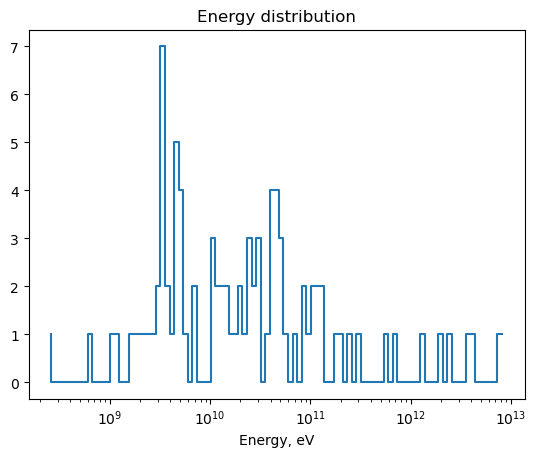

In [7]:
cascade_analysis.plot_energy(13)

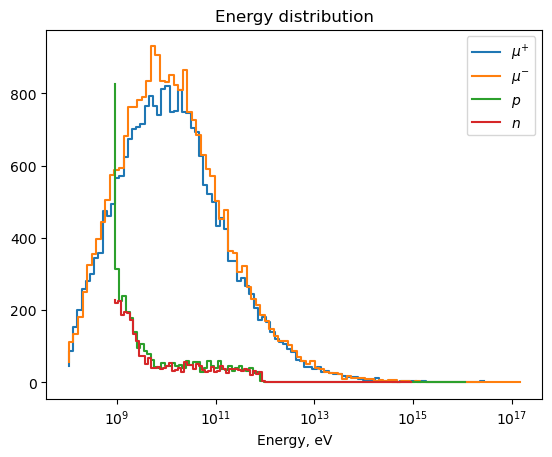

In [37]:
cascade_analysis.plot_energy_list([-13, 13, 2212, 2112])

Min = 40.34, Max = 1011.46


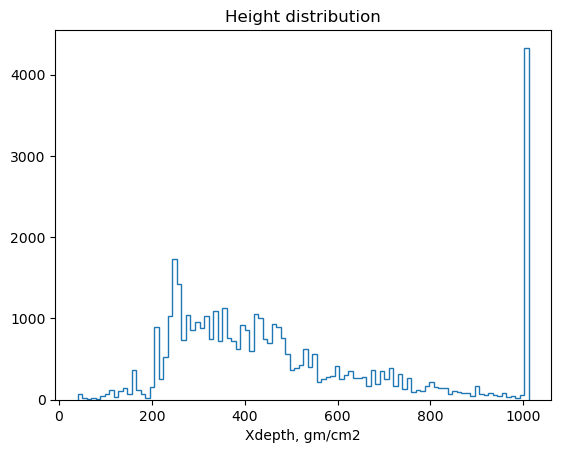

In [29]:
cascade_analysis.plot_xdepth()